<a href="https://colab.research.google.com/github/alejandromunizsiques/Ejercicios-Coding-Dojo/blob/main/Titanic_Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de librerias

In [ ]:
!pip install klib
!pip install --upgrade klib
import klib as klib
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report



     |████████████████████████████████| 23.2 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


# Montaje del dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Competiciones Kaggle/Titanic Competition/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleaning

In [ ]:
df['Cabin'] = df['Cabin'].fillna(value = "No Cabin")
df["Age"]= df["Age"].fillna(value = df["Age"].mean())
df['Embarked'] = df['Embarked'].fillna(value = "S")

In [ ]:
df['Embarked'].mode()
df["Sex"] = df["Sex"].map({"male":0,"female":1})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,No Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,No Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,No Cabin,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,No Cabin,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


# Seleccion de features

# EDA

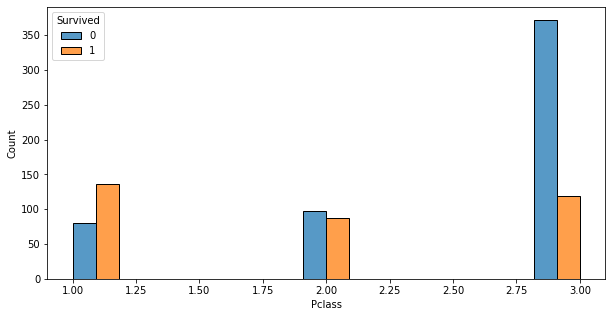

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="Pclass", hue=df["Survived"],data=df,multiple="dodge")

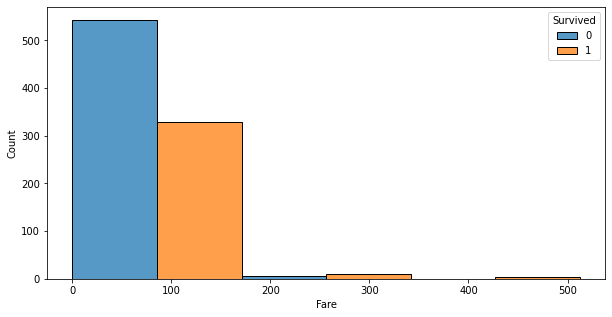

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="Fare", hue=df["Survived"],data=df,bins=3,multiple="dodge")

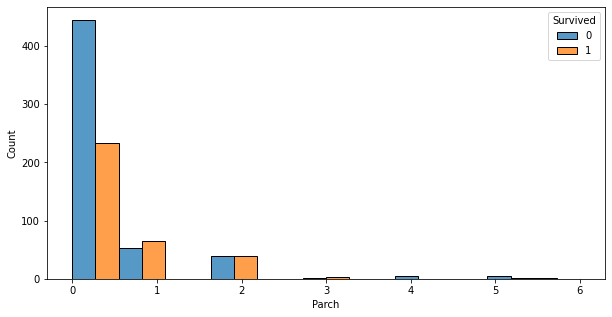

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="Parch", hue=df["Survived"],data=df,multiple="dodge")

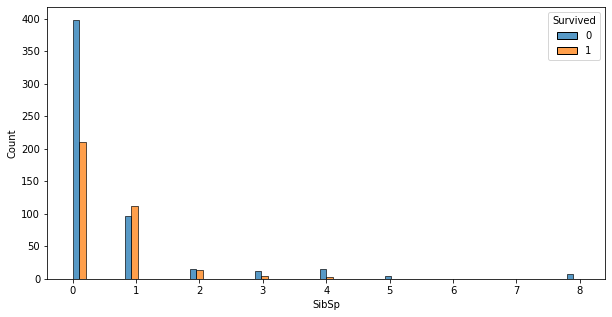

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="SibSp", hue=df["Survived"],data=df,multiple="dodge")

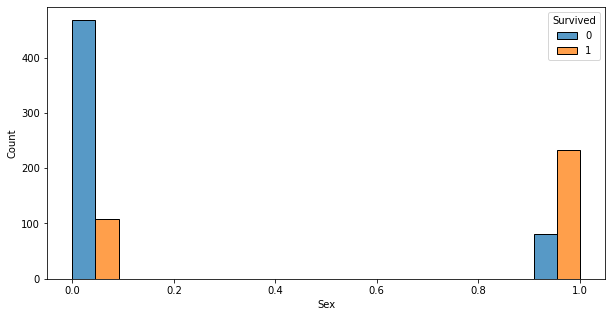

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="Sex", hue=df["Survived"],data=df,multiple="dodge")

In [ ]:
X = df[["Pclass","Sex","Age","SibSp","Parch","Fare"]]
y = df["Survived"]

# Escalamiento y division de entrenamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)



In [ ]:



param_grid3={'randomforestclassifier__n_estimators': [100,200,300,400,500,600],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__max_depth' : [3,4,5,6,7,8,9],
    'randomforestclassifier__criterion' :['gini', 'entropy']}

grid1 = GridSearchCV(estimator = pipe_RF2, param_grid = param_grid3, scoring = 'f1_micro', cv=10) 
grid1.fit(X_train,y_train)






NameError: ignored

In [ ]:
accuracy = grid1.score(X_test,y_test)
y_predict_RF = grid1.predict(X_test)
F1_SCORE_grid = f1_score(y_test,y_predict_RF, average='micro')
F1_SCORE_grid

In [ ]:
sns.lineplot(X = accuracy, y = F1_SCORE_grid )

In [ ]:
grid1.get_params().keys()

# RandomForest

# GirdSeacrh

In [ ]:
print("Mejor score (F1 Micro): ", grid1.best_score_)   #Codigo sacado de Abolt github
print("Mejores hiperparámetros: ", grid1.best_params_)
print("Mejor modelo: ", grid1.best_estimator_)

Mejor_modelo_RF = grid1.best_estimator_

In [ ]:
clf.score(X_test, y_test)